In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print('seaborn version: {}'.format(sns.__version__))
%matplotlib inline

seaborn version: 0.10.1


In [53]:
import warnings
warnings.filterwarnings('ignore')


In [54]:
import os
for dirname, _, filenames in os.walk('/home/yasmin/KaggleChallenges/Titanic:_Machine_Learning_from_Disaster'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/yasmin/KaggleChallenges/Titanic:_Machine_Learning_from_Disaster/gender_submission.csv
/home/yasmin/KaggleChallenges/Titanic:_Machine_Learning_from_Disaster/train.csv
/home/yasmin/KaggleChallenges/Titanic:_Machine_Learning_from_Disaster/test.csv
/home/yasmin/KaggleChallenges/Titanic:_Machine_Learning_from_Disaster/Untitled.ipynb
/home/yasmin/KaggleChallenges/Titanic:_Machine_Learning_from_Disaster/.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [55]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Analysis Data
#### Separating in number columns and string columns

In [58]:
arrayNumbers = []

for x in df.columns:
    i = 0;
    for y in range(len(df[x])):
        if type(df.loc[y,x]) == np.str:
               i+=1
    if(i==0):
        arrayNumbers.append(x)
arrayNumbers

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [59]:
arrayStr = []

for x in df.columns:
    arrayStr.append(x)

for x in arrayNumbers:
    arrayStr.remove(x)
arrayStr

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [60]:
from nltk.probability import FreqDist

In [61]:
arrayCategoryNumbers = []

for x in arrayNumbers:
    arr = []
    for y in df[x]:
        arr.append(y)
    freq = FreqDist(arr)
    if(len([*freq.keys()])< 10):
        arrayCategoryNumbers.append(x)
arrayCategoryNumbers

['Survived', 'Pclass', 'SibSp', 'Parch']

In [62]:
arrayCategoryStr = []

for x in arrayStr:
    arr = []
    for y in df[x]:
        arr.append(y)
    freq = FreqDist(arr)
    if(len([*freq.keys()])< 10):
        arrayCategoryStr.append(x)
arrayCategoryStr

['Sex', 'Embarked']

In [63]:
for x in arrayCategoryStr:
    arrayStr.remove(x)
for x in arrayCategoryNumbers:
    arrayNumbers.remove(x)

In [64]:
print(arrayCategoryNumbers,'\n')
print(arrayCategoryStr,'\n')
print(arrayNumbers,'\n')
print(arrayStr,'\n')

['Survived', 'Pclass', 'SibSp', 'Parch'] 

['Sex', 'Embarked'] 

['PassengerId', 'Age', 'Fare'] 

['Name', 'Ticket', 'Cabin'] 



In [65]:
for x in arrayCategoryStr:
    for y in range(len(df[x])):
        if pd.isna(df.loc[y,x]):
            df.loc[y,x] = 'Not Founded'
for x in arrayStr:
    for y in range(len(df[x])):
        if pd.isna(df.loc[y,x]):
            df.loc[y,x] = 'Not Founded'

In [66]:
def graph_Category(name):
    plt.figure(figsize=(45,15))
    sns.set(font_scale=3)
    sns.countplot(x=name,data=df)
    plt.ylabel("Number of Passenger")
    plt.xlabel(name)
    plt.title("Number of Passenger Per "+name)
    plt.grid(b=True)
    

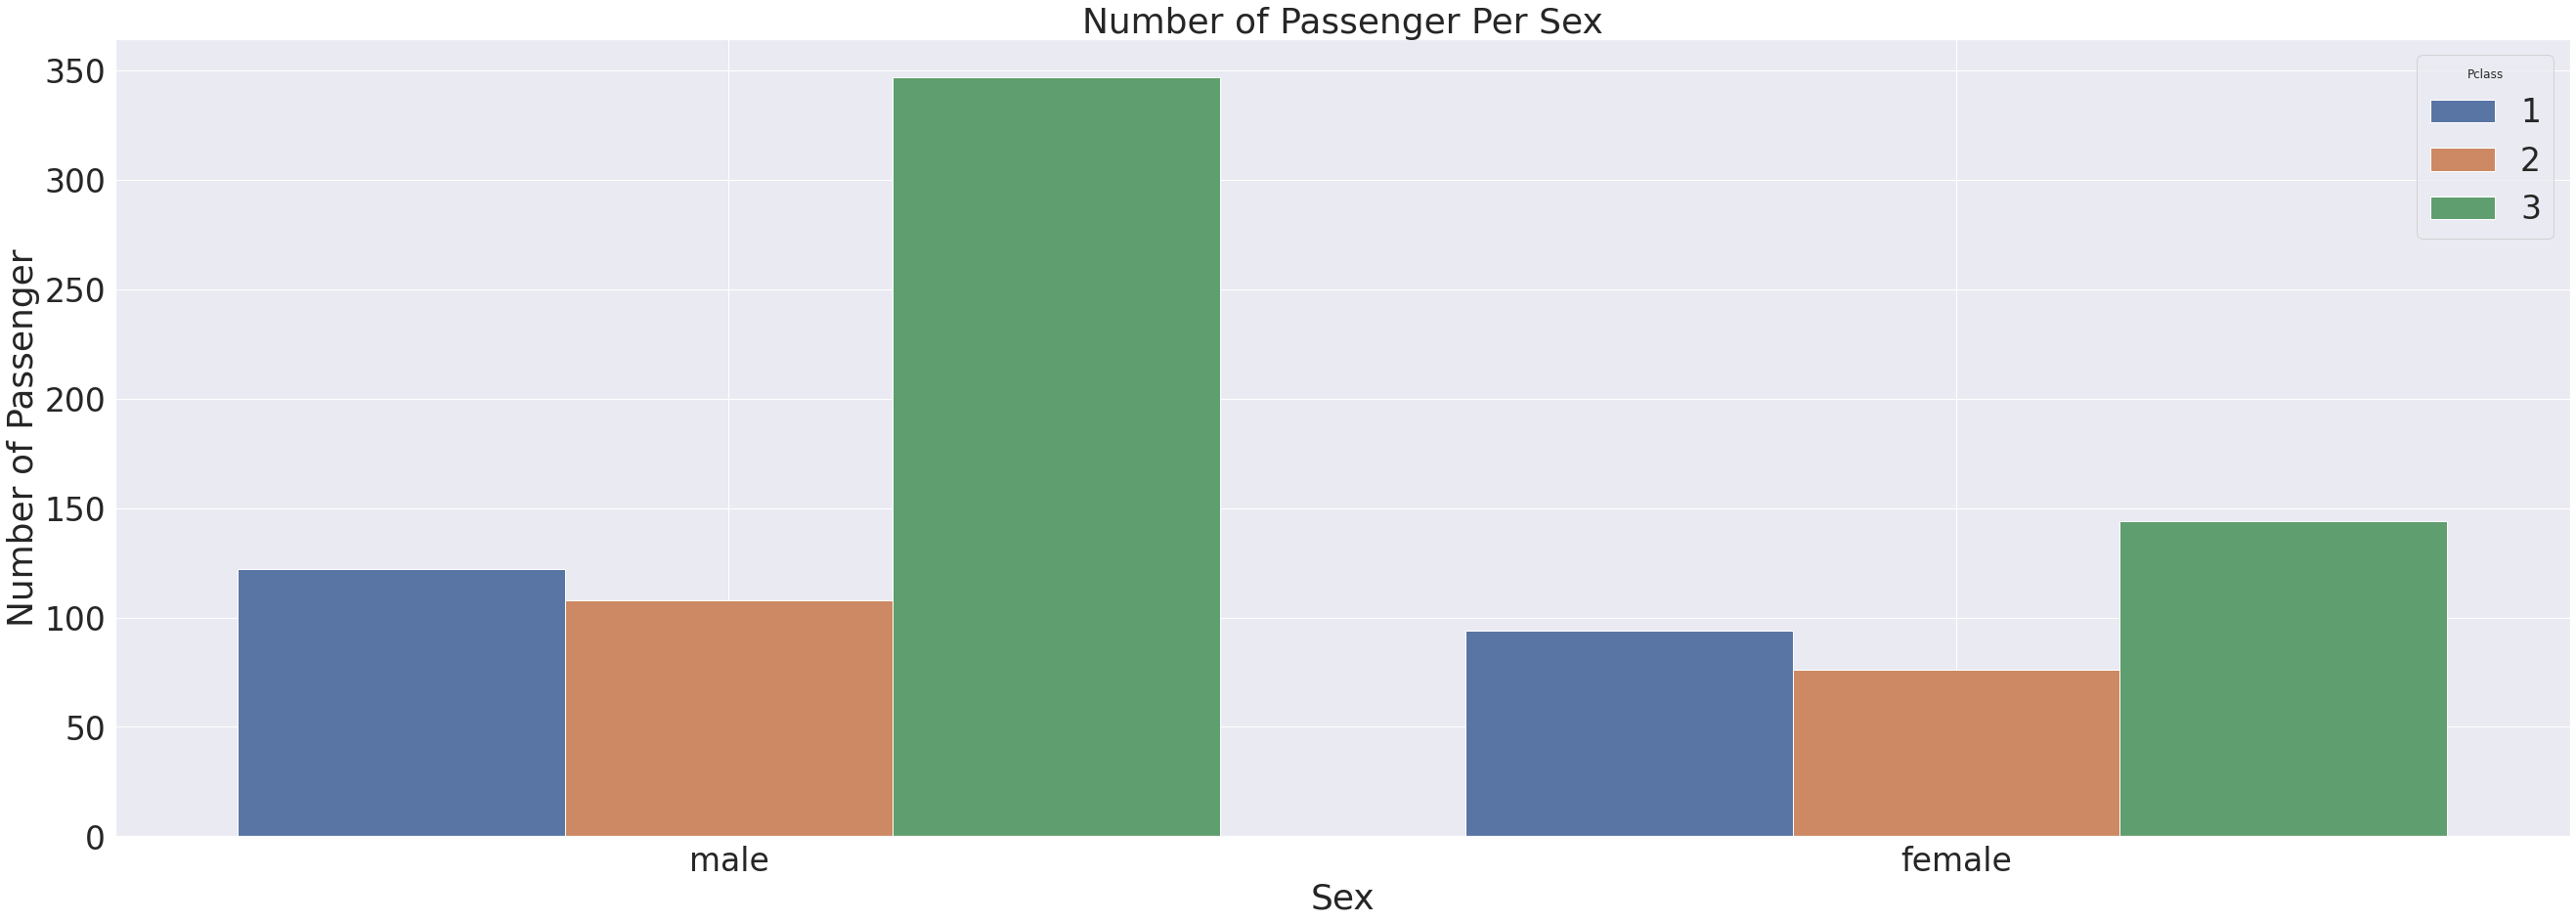

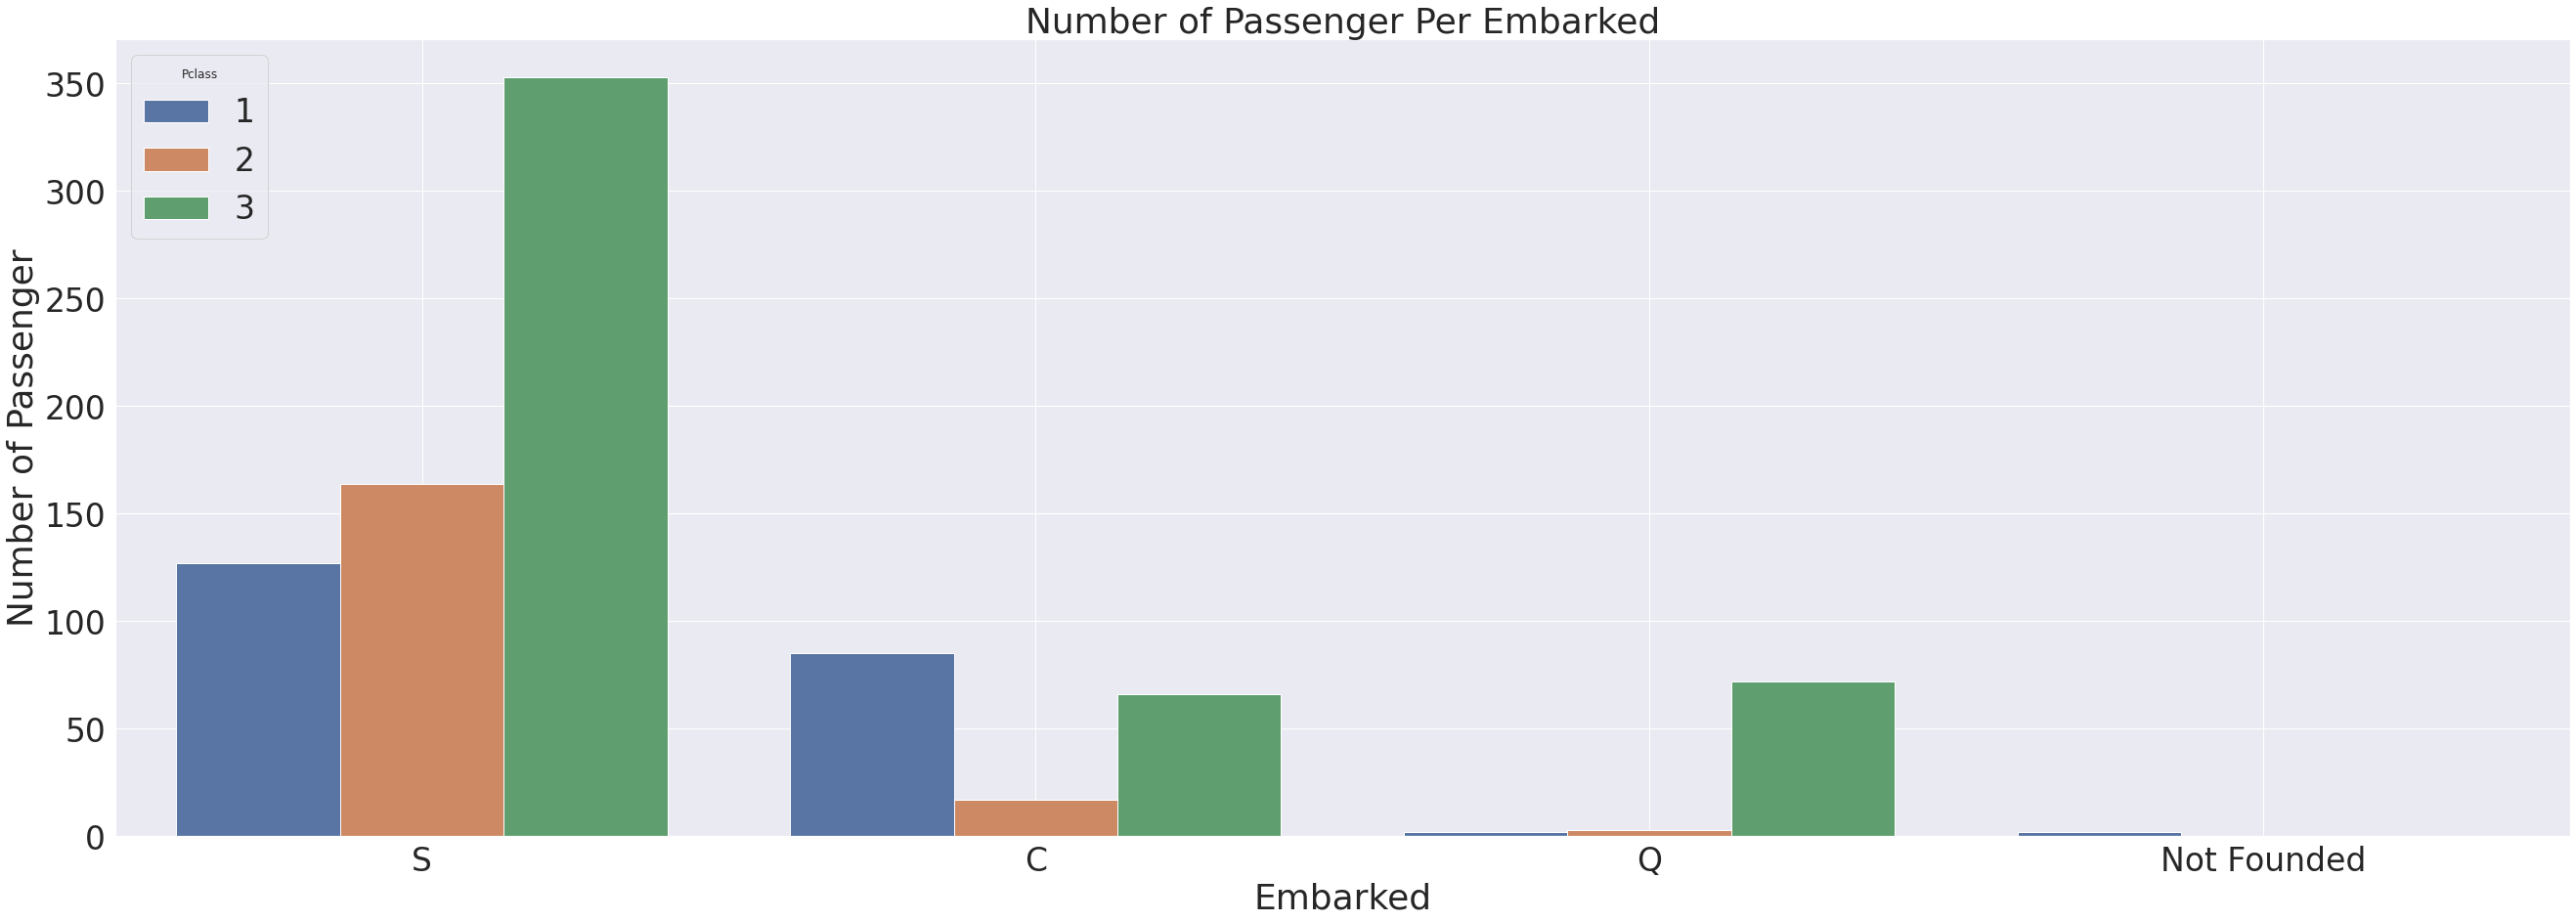

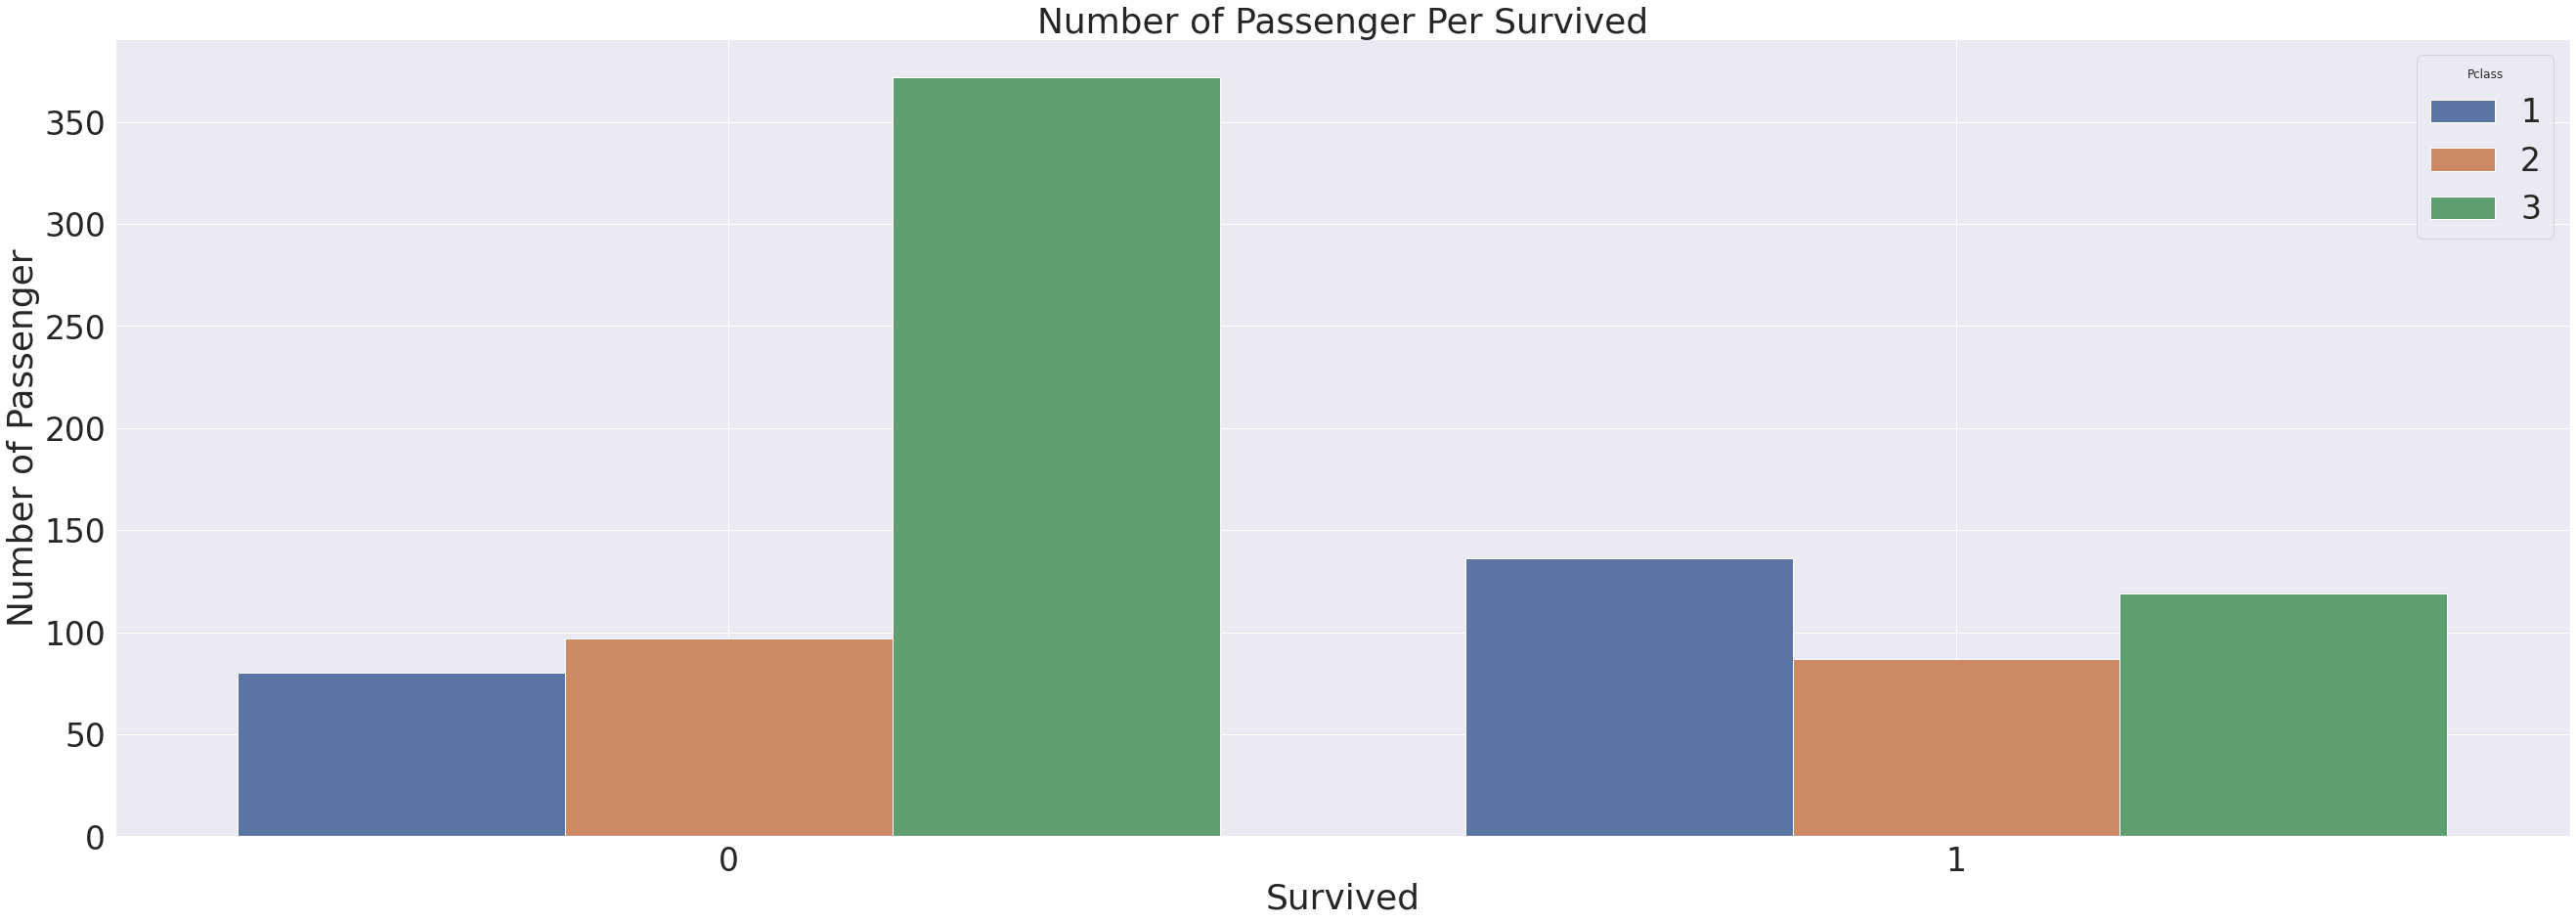

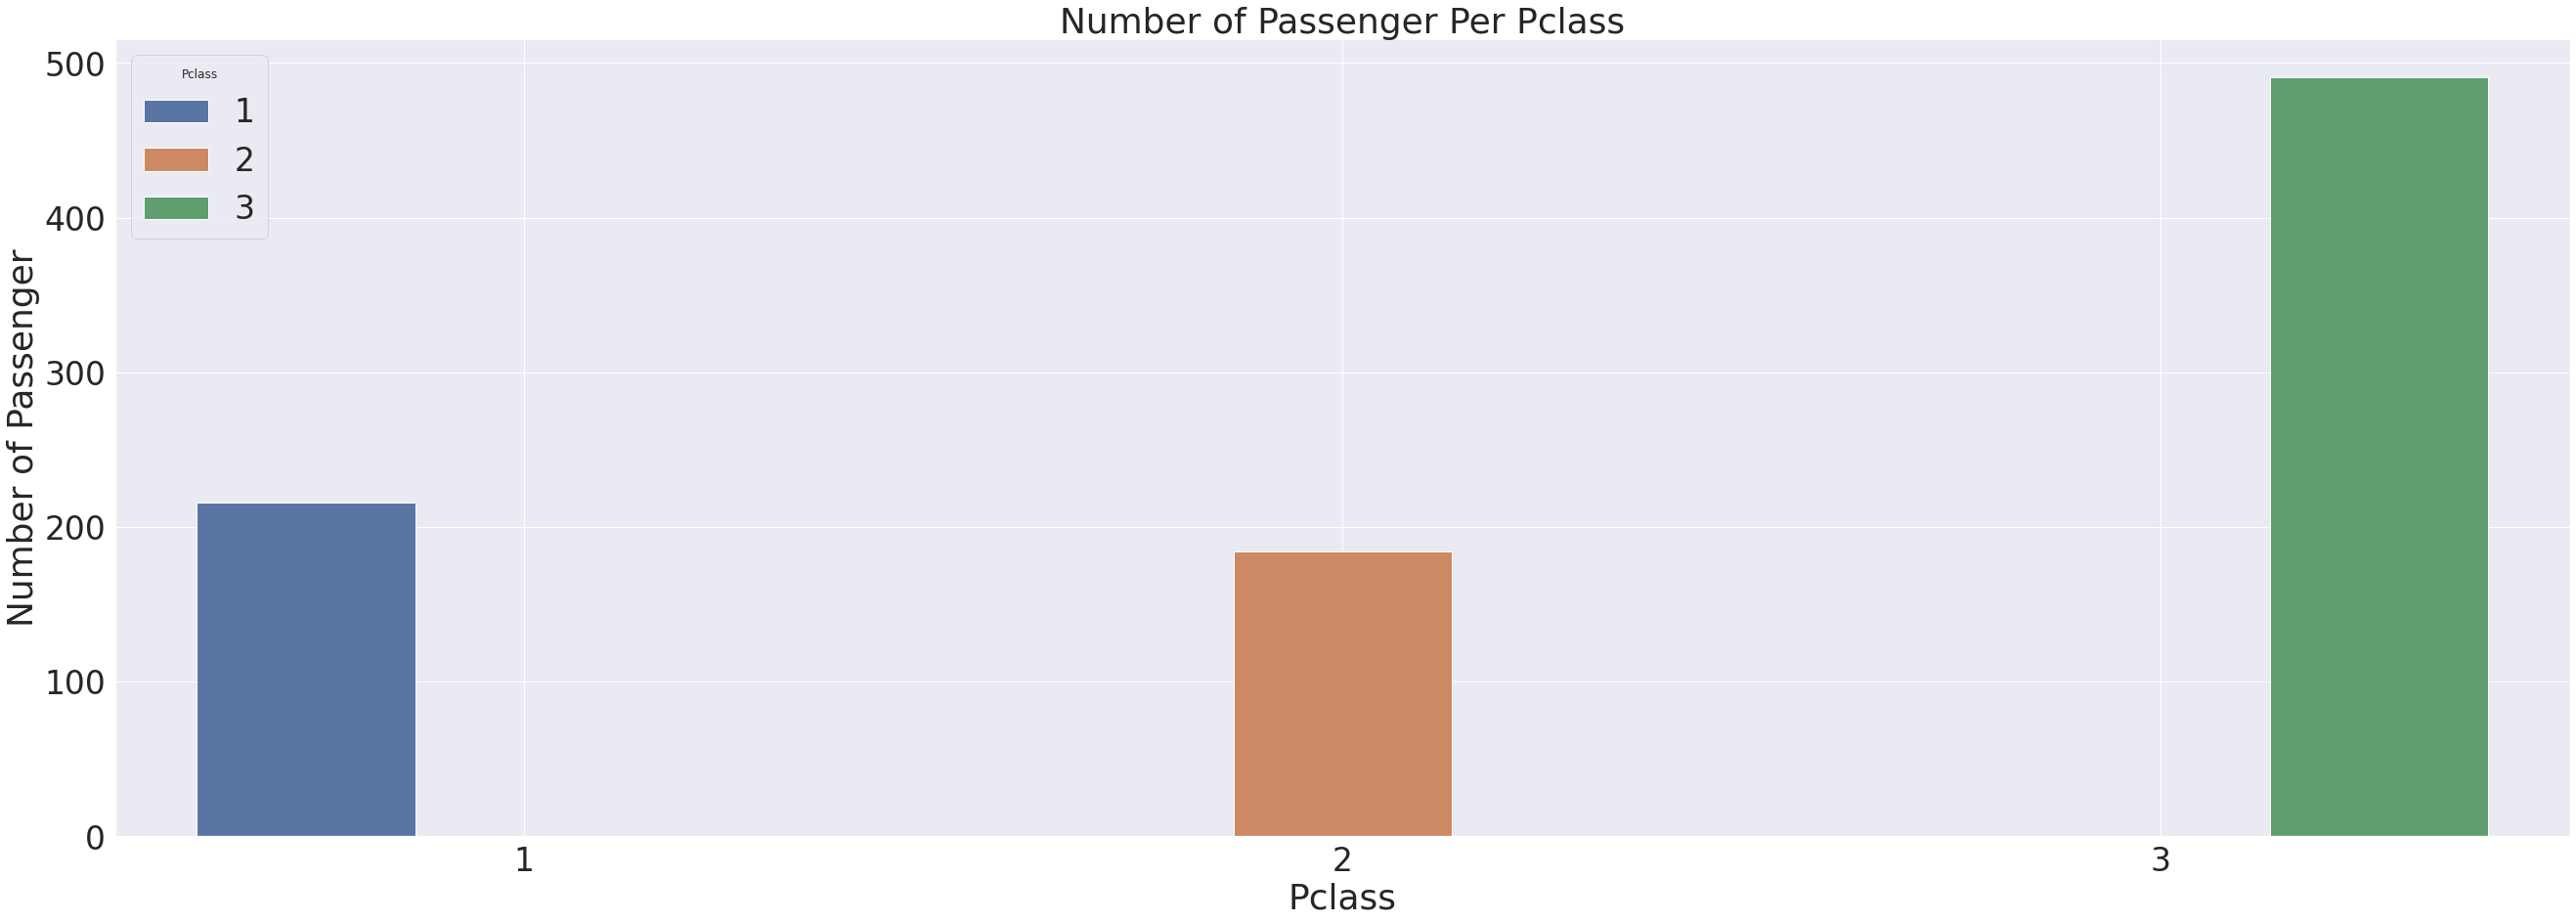

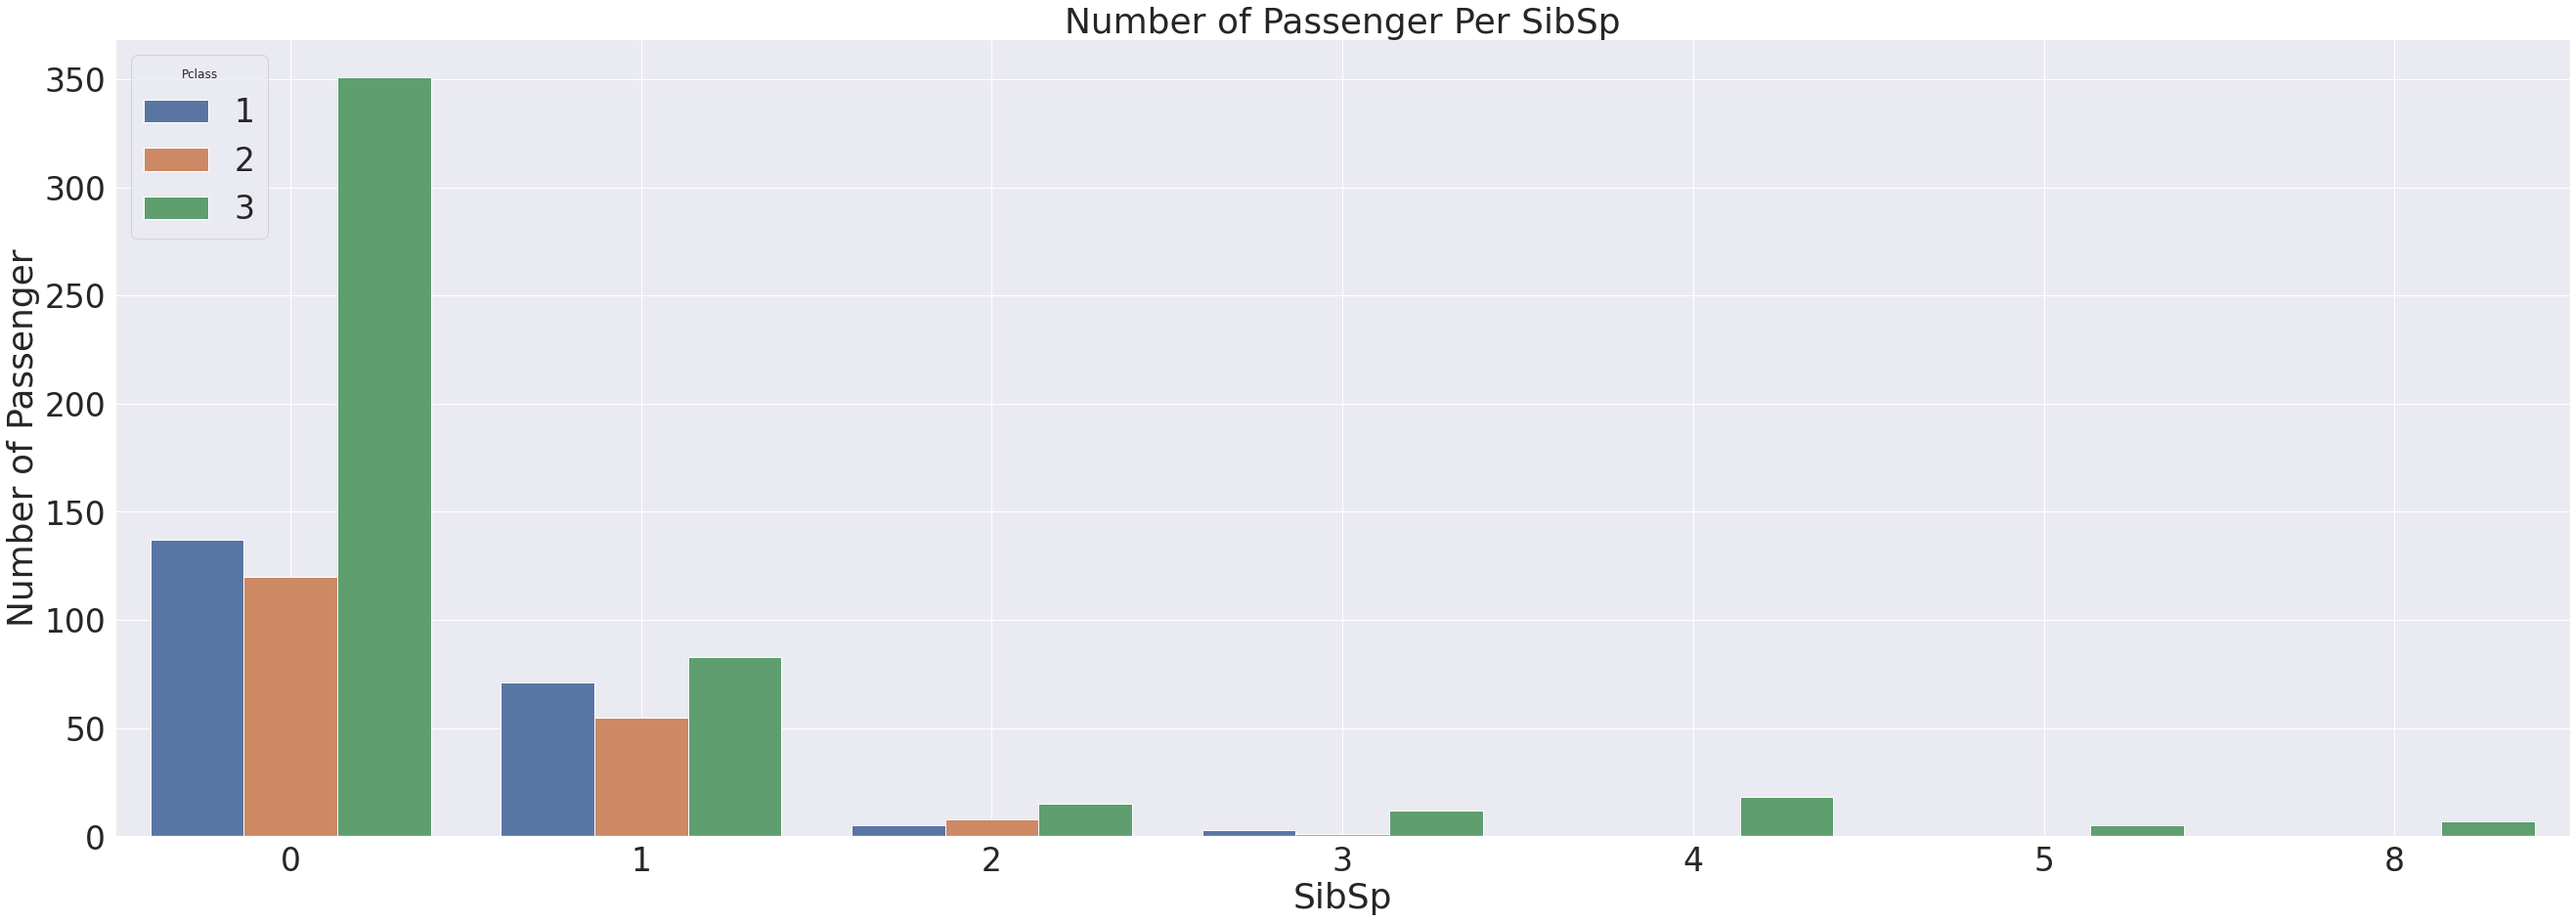

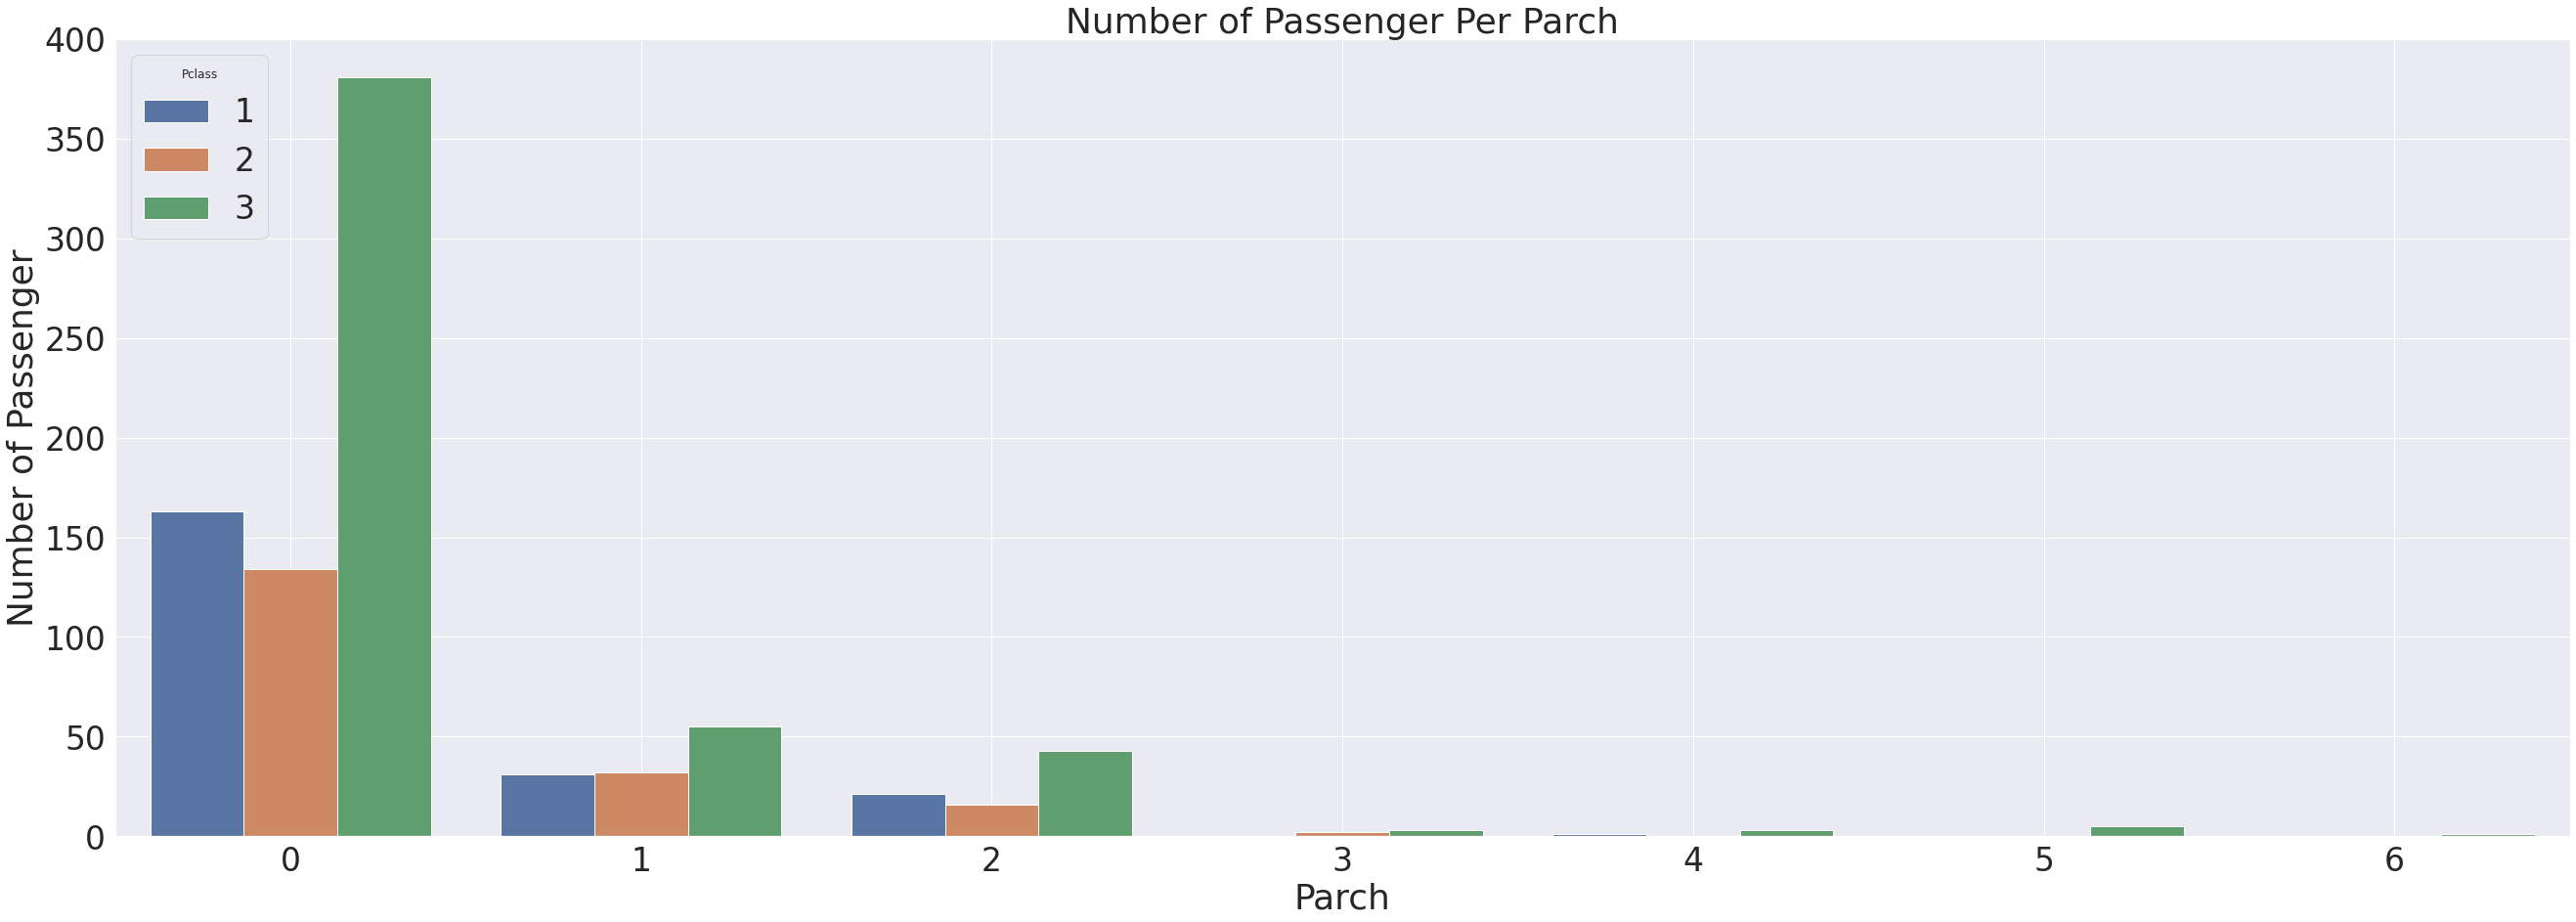

In [67]:
for x in arrayCategoryStr:
    graph_Category(x)
for x in arrayCategoryNumbers:
    graph_Category(x)

In [17]:
arrayNumbers.remove('PassengerId')

In [18]:
arrayNumbers

['Age', 'Fare']

In [19]:
def plot_range_variable(columnname):

    limite = []
    limite.append(float(pd.DataFrame(df[columnname]).quantile(0.25)))
    limite.append(float(pd.DataFrame(df[columnname]).quantile(0.50)))
    limite.append(float(pd.DataFrame(df[columnname]).quantile(0.75)))
    
    limiteStr = []

    for y in range(len(limite)):
        if(y==0):
            limiteStr.append('Less than '+ str(limite[y]))
        else:
            limiteStr.append('Less than '+ str(limite[y]) + ' \n and bigger than ' + str(limite[y-1]))
    
    
    count = pd.DataFrame([0,0,0], index=limiteStr)
    for z in df[columnname]:
        for w in range(len(limite)):
            if w==0 and (float(z)<=float(limite[w])):
                count.loc[limiteStr[w],0]+=1
            elif (float(z)<=float(limite[w])) and (float(z)>float(limite[w-1])):
                count.loc[limiteStr[w],0]+=1
    count.loc['Undefined',0] = len(df[columnname]) - count[0].sum() 
    print(count)
    plt.figure(figsize=(45,15))
    sns.set(font_scale=3)
    ax = sns.barplot(x=count.index,y=count.loc[count.index,0], data=count)
    plt.ylabel("Number of Passengers")
    plt.grid(b=True)
    plt.title("Number of Passenger Per "+ columnname)
    plt.xlabel(columnname)
    print(len(count))

                                              0
Less than 20.125                          179.0
Less than 28.0 \n and bigger than 20.125  183.0
Less than 38.0 \n and bigger than 28.0    175.0
Undefined                                 354.0
4
                                                 0
Less than 7.9104                             223.0
Less than 14.4542 \n and bigger than 7.9104  224.0
Less than 31.0 \n and bigger than 14.4542    222.0
Undefined                                    222.0
4


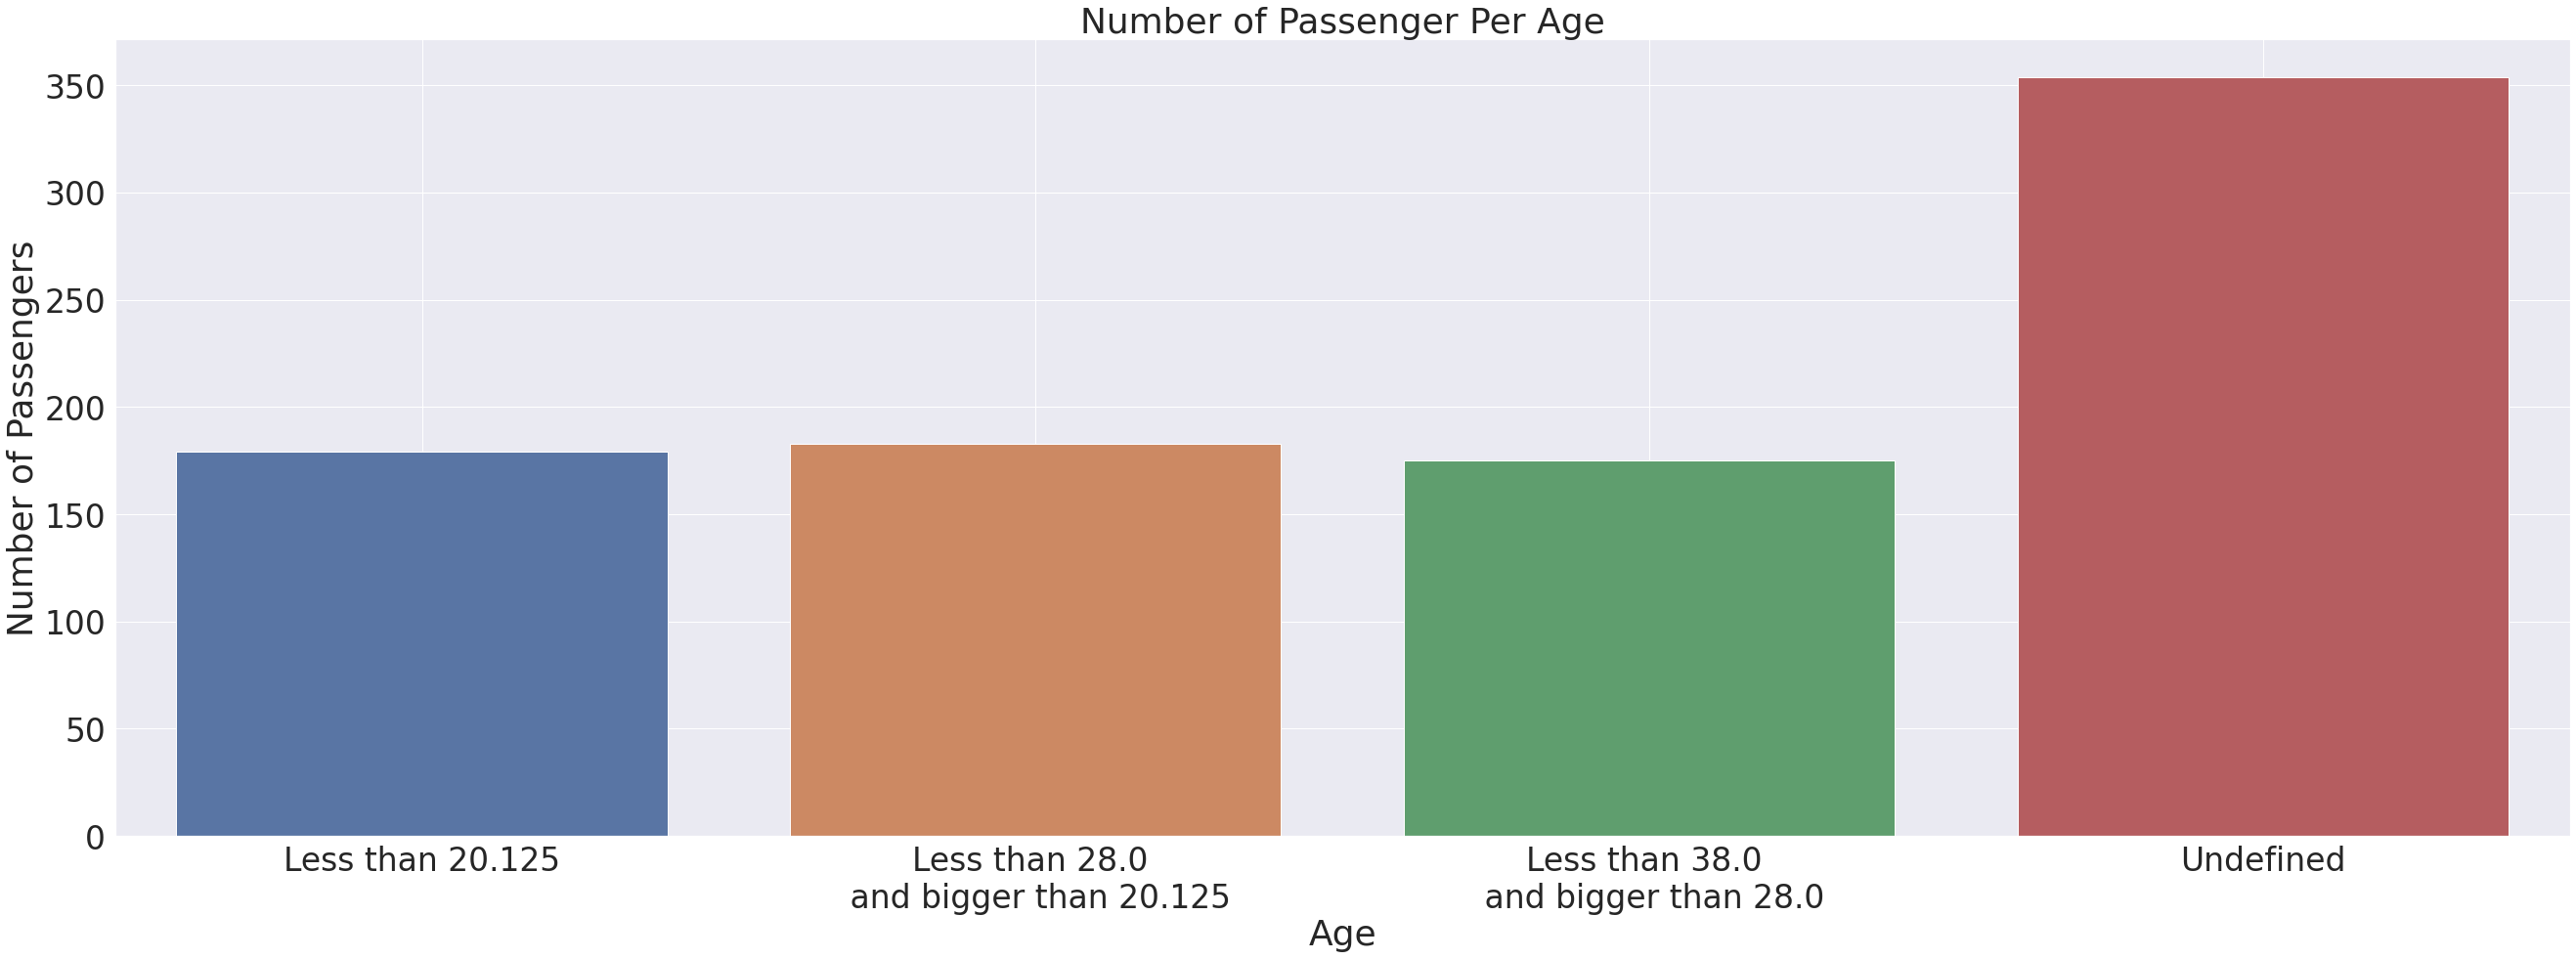

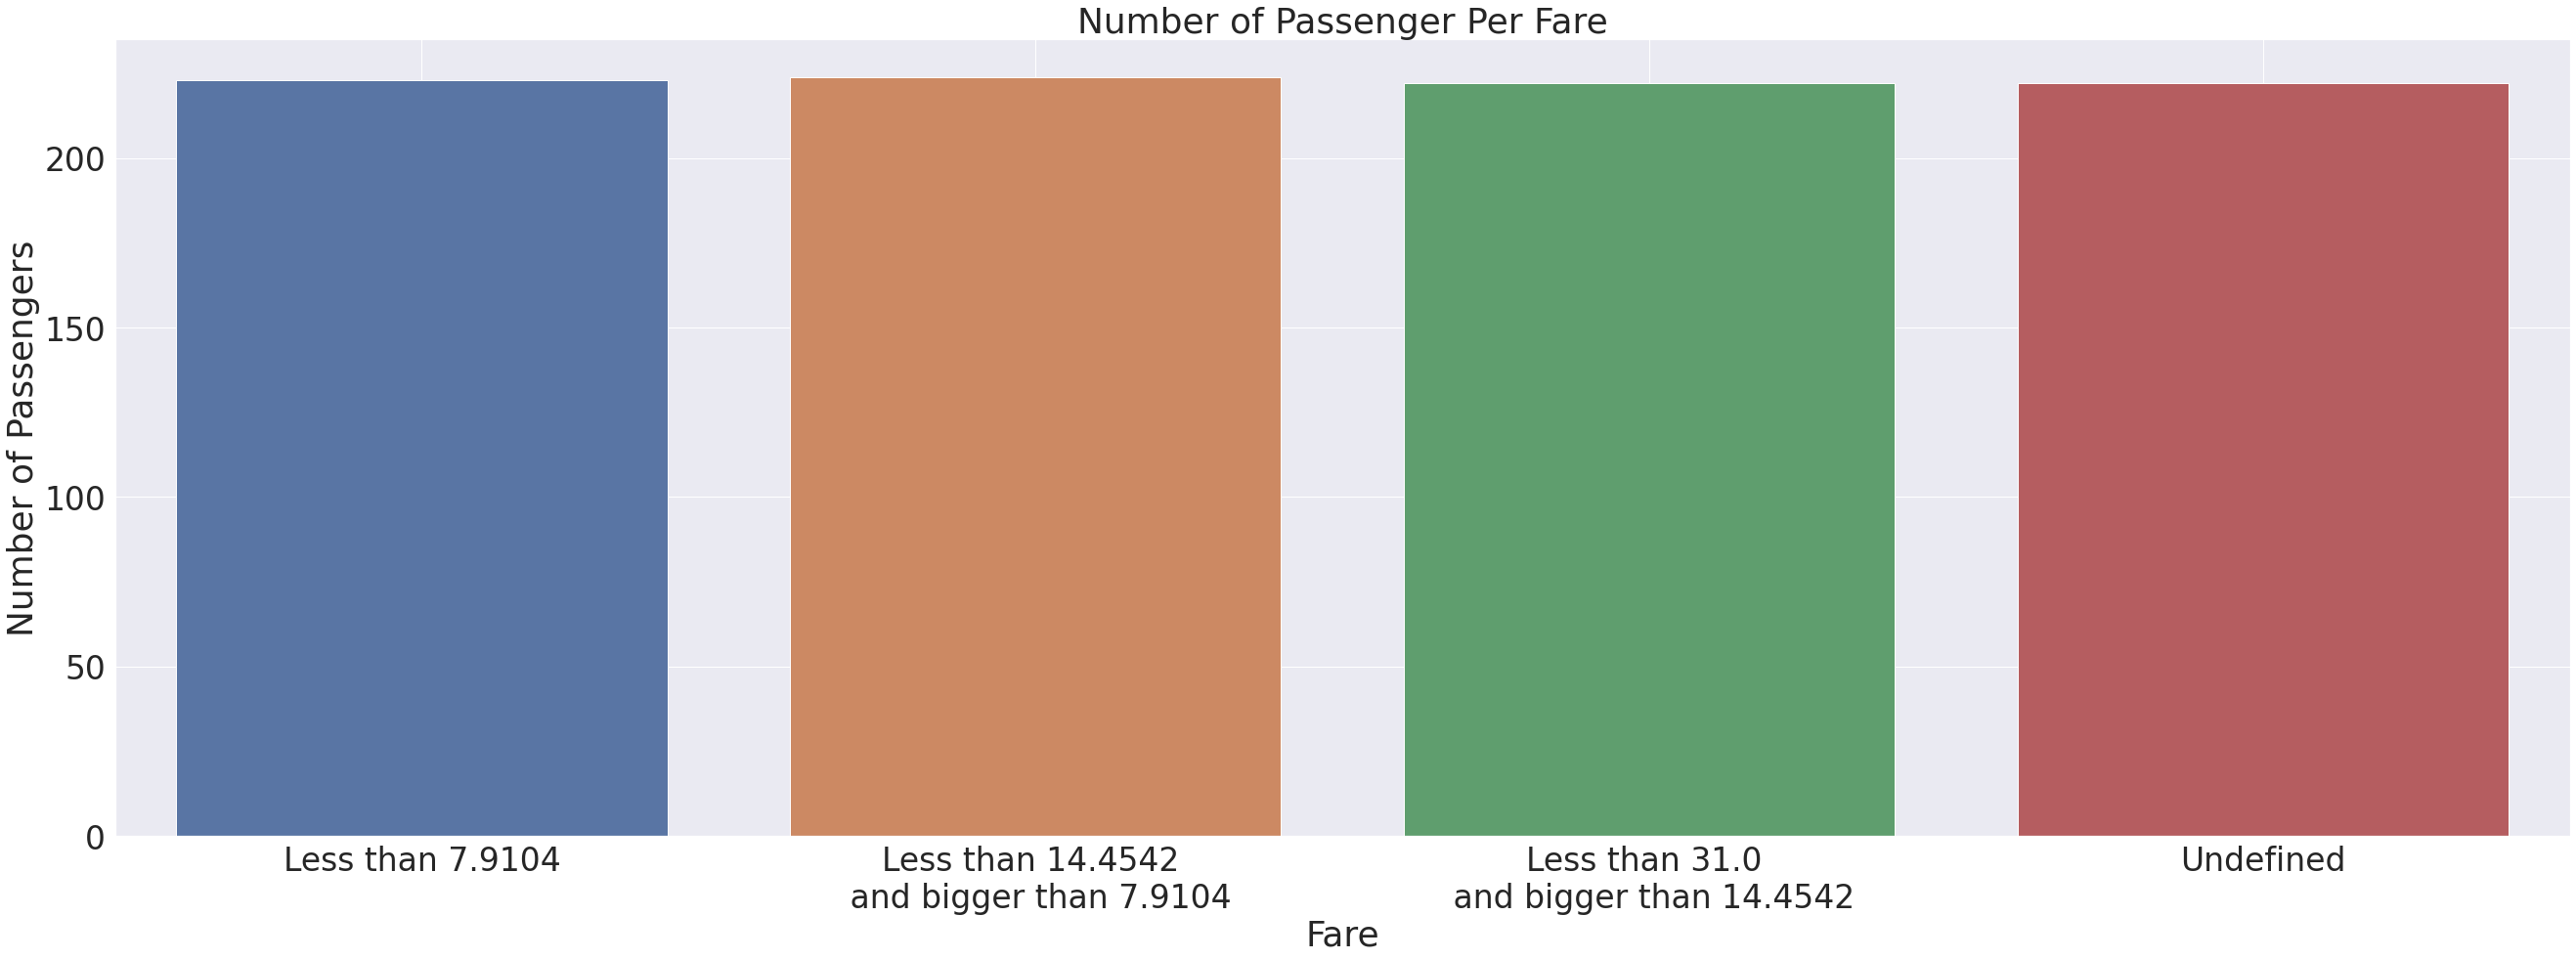

In [20]:
for x in arrayNumbers:
    plot_range_variable(x)

In [21]:
df[arrayStr]

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,Not Founded
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,Not Founded
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,Not Founded
...,...,...,...
886,"Montvila, Rev. Juozas",211536,Not Founded
887,"Graham, Miss. Margaret Edith",112053,B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,Not Founded
889,"Behr, Mr. Karl Howell",111369,C148


In [22]:
 def plot_str(colunmname):
    a = []
    

    arr = []
    if(colunmname == 'Name'):
        for x in df[colunmname]:
            a.append(x.split(','))
        for x in a:
            arr.append(x[0])
    else:
        for x in df[colunmname]:
            a.append(x)
        for x in a:
            arr.append(x)

    freq = FreqDist(arr)
    freq.values()
    dn = pd.DataFrame({'values':[*freq.values()],'keys':[*freq.keys()]})
    
    plt.figure(figsize=(50,15))
    sns.set(font_scale=3)
    if(colunmname == arrayStr[0]):
        ax = sns.barplot(y='values',x='keys', data=dn[dn['values']>3])
    if(colunmname == arrayStr[1]):
        ax = sns.barplot(y='values',x='keys', data=dn[dn['values']>=4])
    if(colunmname == arrayStr[2]):
        ax = sns.barplot(y='values',x='keys', data=dn[dn['values']>2])
    plt.xticks(rotation=90)
    plt.ylabel("Number of Passenger")
    plt.xlabel(colunmname)
    
    plt.title("Number of Passenger Per "+colunmname)
    plt.grid(b=True)


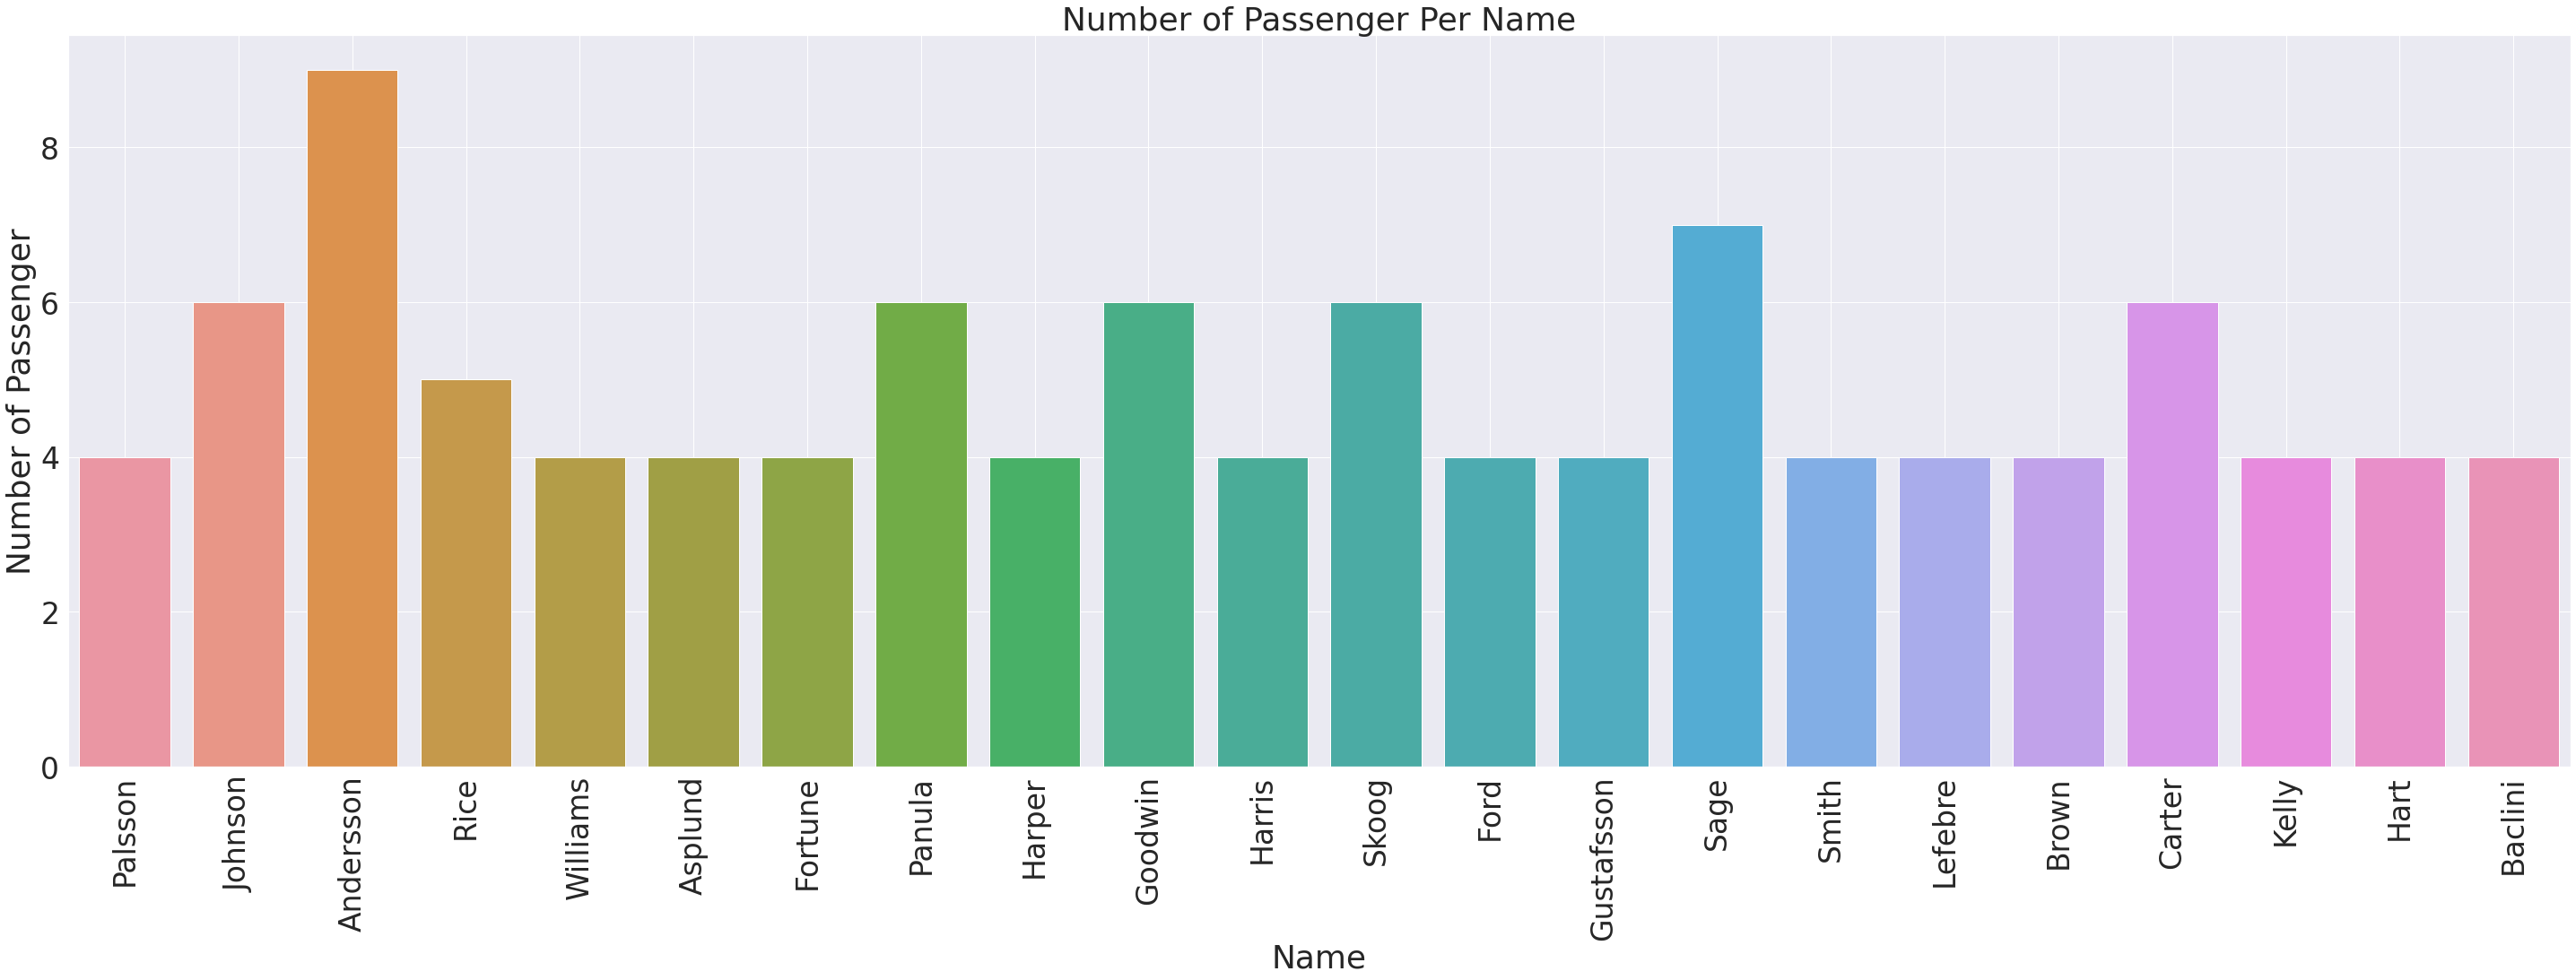

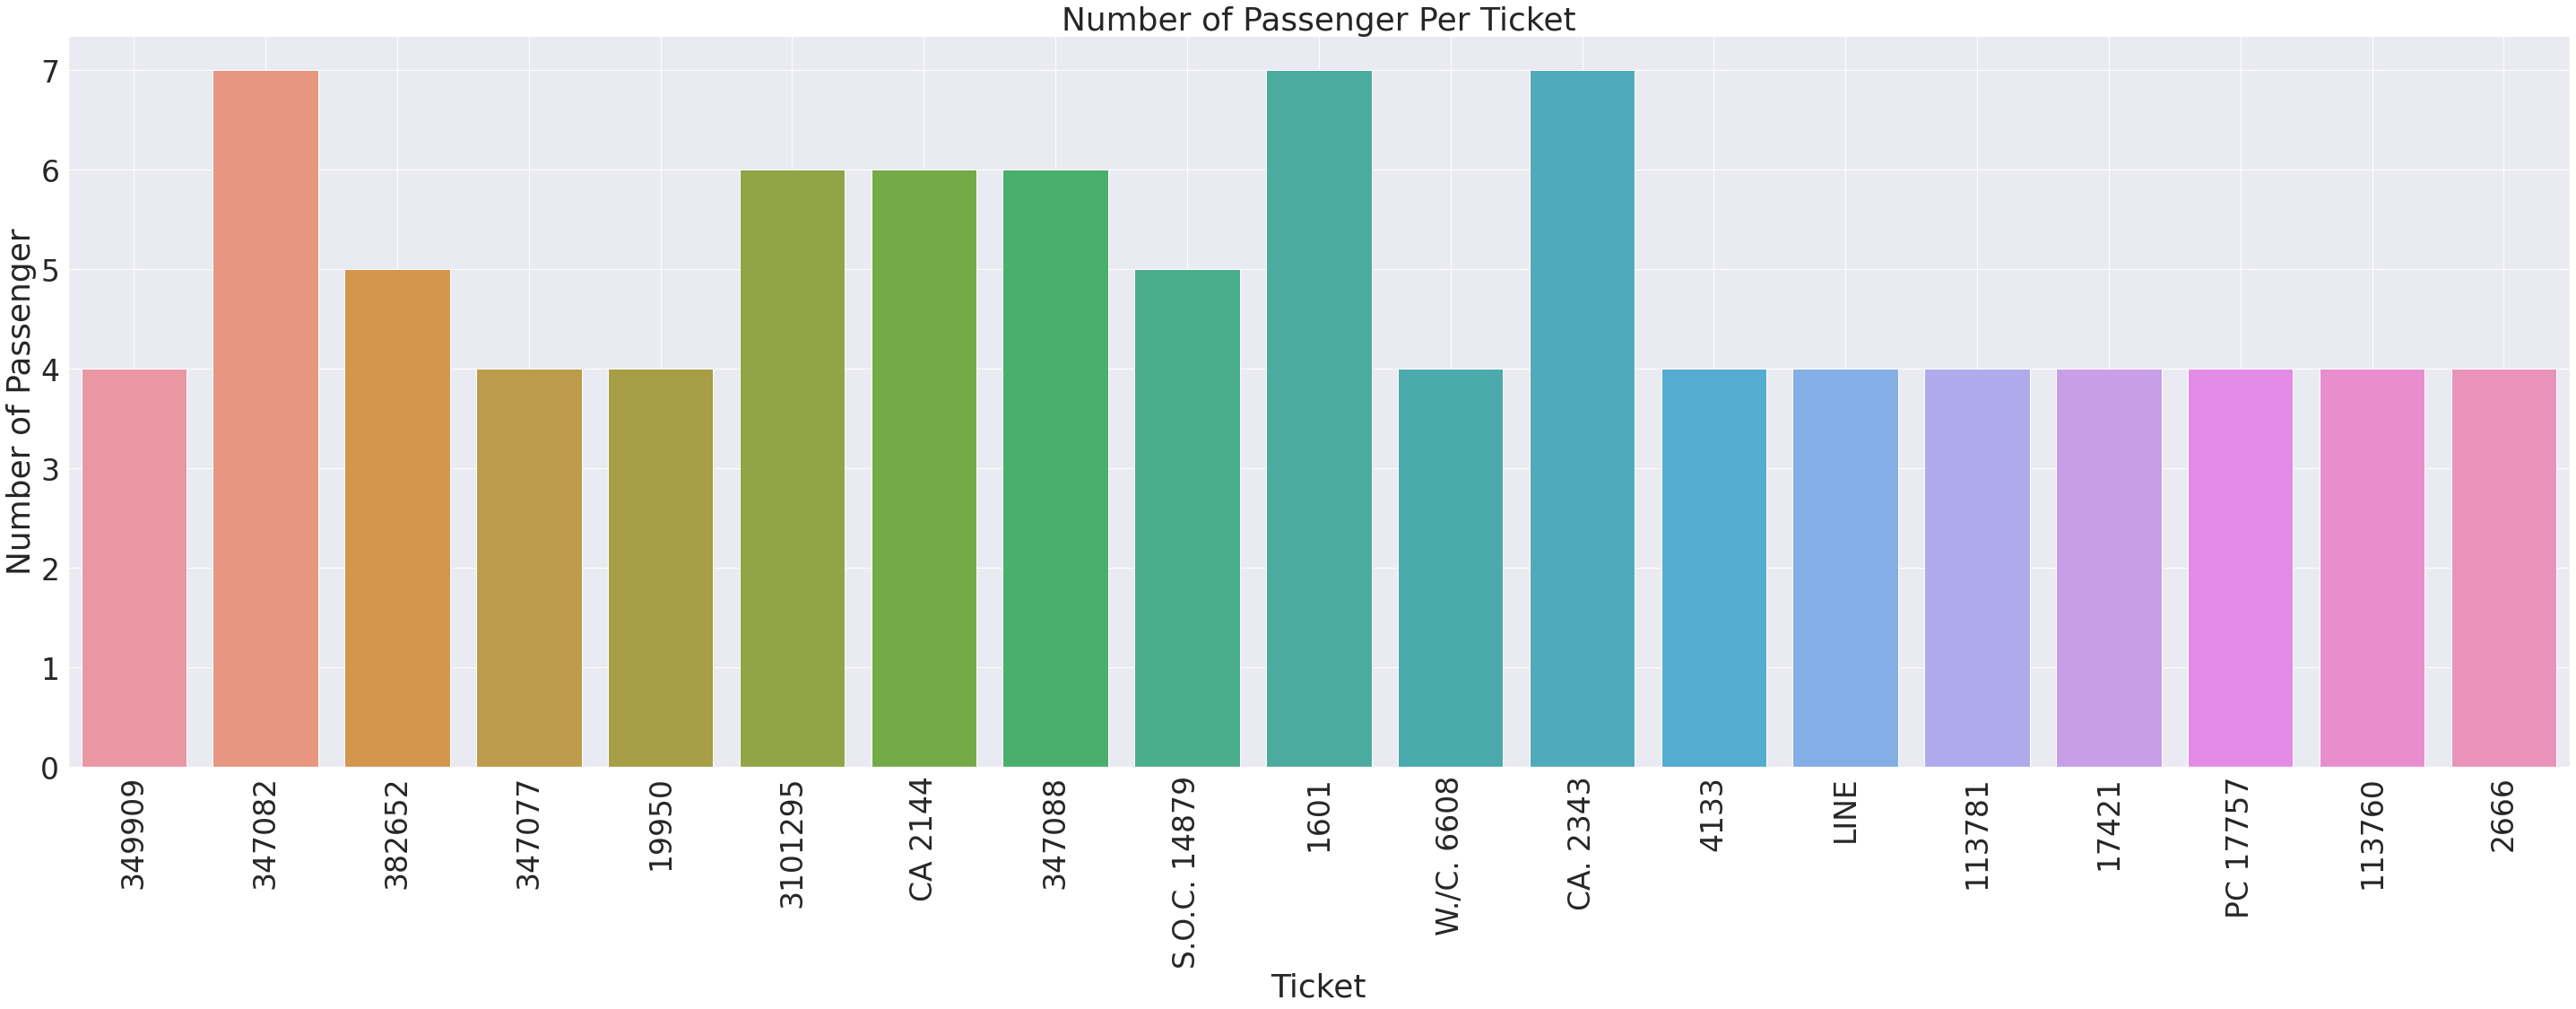

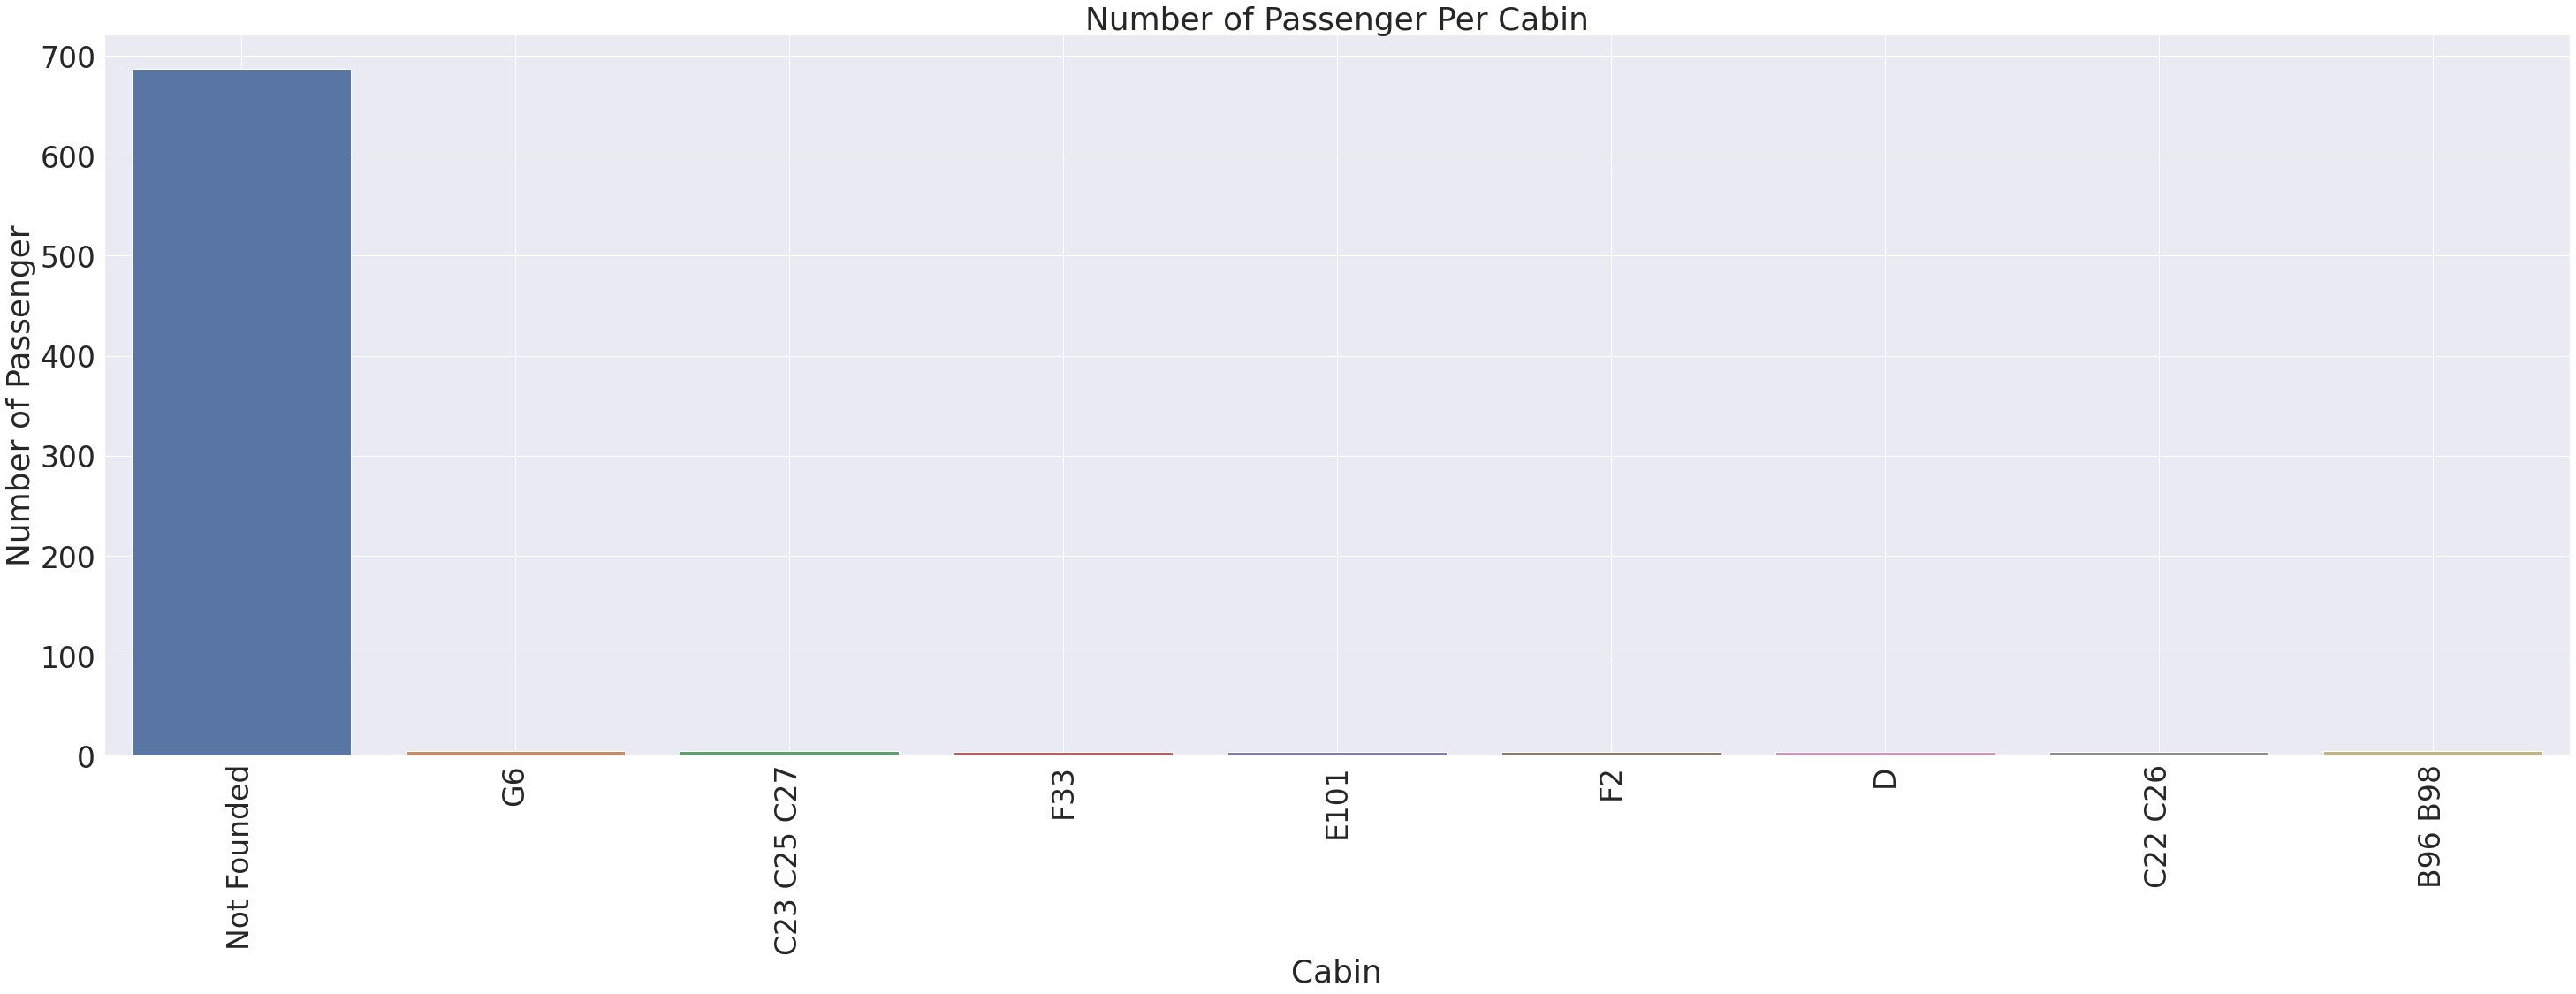

In [23]:
for x in arrayStr:
    plot_str(x)

Convert Str in Number to Apply Supervisioned Tecniques Machine Learning

In [24]:
def convert_process(x):
                
    x['Name'] = x['Name'].apply(lambda x : x.split(',')[0])
    x['Age'] = x['Age'].astype('category').cat.codes
    x['Name'] = x['Name'].astype('category').cat.codes
    x['Embarked'] = x['Embarked'].astype('category').cat.codes
    x['Sex'] = x['Sex'].astype('category').cat.codes
    x['Cabin'] = x['Cabin'].astype('category').cat.codes
    x['Ticket'] = x['Ticket'].astype('category').cat.codes
    
    return x

Applying Machine Learning

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

In [42]:
train_df = convert_process(df)
test_df = convert_process(pd.read_csv('test.csv'))

xtrain = train_df.drop("Survived", axis=1)
ytrain = train_df["Survived"]
xtest  = test_df
ytext = pd.read_csv('gender_submission.csv')

for y in range(len(xtest['Fare'])):
    if pd.isna(xtest.loc[y,'Fare']):
        xtest.loc[y,'Fare'] = 0
xtest['Fare'] = xtest['Fare'].astype('int')

xtest.dtypes

AttributeError: 'int' object has no attribute 'split'

In [47]:
x= [ LogisticRegression,RandomForestClassifier,Perceptron, SGDClassifier,DecisionTreeClassifier,
    SVC, LinearSVC, GaussianNB, KNeighborsClassifier]
z = ['LogisticRegression','RandomForestClassifier',
     'Perceptron', 'SGDClassifier','DecisionTreeClassifier',
     'SVC', 'LinearSVC', 'GaussianNB', 'KNeighborsClassifier']

In [49]:
d_accuracy = pd.DataFrame({'Algoritms': ['LogisticRegression','RandomForestClassifier',
                                         'Perceptron', 'SGDClassifier','DecisionTreeClassifier',
                                         'SVC', 'LinearSVC', 'GaussianNB', 'KNeighborsClassifier']})
i = 0
for w in x:
    lr = w()
    lr.fit(xtrain, ytrain)
    pred = lr.predict(xtest)
    print('\n',z[i],'\n')
    print(confusion_matrix(ytext['Survived'],pred))
    print(classification_report(ytext['Survived'],pred))
    d_accuracy.loc[i,'Accuracy'] = accuracy_score(ytext['Survived'],pred)
    d_accuracy.loc[i,'Recall'] = recall_score(ytext['Survived'],pred)
    d_accuracy.loc[i,'F1'] = f1_score(ytext['Survived'],pred)
    
    i+=1
d_accuracy


 LogisticRegression 

[[257   9]
 [ 80  72]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       266
           1       0.89      0.47      0.62       152

    accuracy                           0.79       418
   macro avg       0.83      0.72      0.74       418
weighted avg       0.81      0.79      0.77       418


 RandomForestClassifier 

[[186  80]
 [  2 150]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       266
           1       0.65      0.99      0.79       152

    accuracy                           0.80       418
   macro avg       0.82      0.84      0.80       418
weighted avg       0.87      0.80      0.81       418


 Perceptron 

[[219  47]
 [103  49]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       266
           1       0.51      0.32      0.40       152

    accuracy                           0.64     

,Algoritms,Accuracy,Recall,F1
0,LogisticRegression,0.787081,0.473684,0.618026
1,RandomForestClassifier,0.803828,0.986842,0.785340
2,Perceptron,0.641148,0.322368,0.395161
3,SGDClassifier,0.586124,0.388158,0.405498
4,DecisionTreeClassifier,0.523923,0.730263,0.527316
5,SVC,0.464115,0.559211,0.431472
6,LinearSVC,0.669856,0.092105,0.168675
7,GaussianNB,0.373206,0.980263,0.532143
8,KNeighborsClassifier,0.473684,0.493421,0.405405
